In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as coll
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from graphingFunctions import *

red = pd.read_csv("C:\\Users\\Connor\\Documents\\Machine_Learning\\winequality-red.csv", ";")
white = pd.read_csv("C:\\Users\\Connor\\Documents\\Machine_Learning\\winequality-white.csv", ";")

In [2]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
X = red.values[:, :-1]

In [4]:
y = red.values[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [6]:
scaler = StandardScaler()
print(X_train.shape)
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

(1199, 11)


In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
predictions = mlp.predict(X_test)  
co = len(mlp.coefs_)
len(mlp.coefs_)
labels = list(red.columns.values)
labels = labels[:-1]
labels[:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

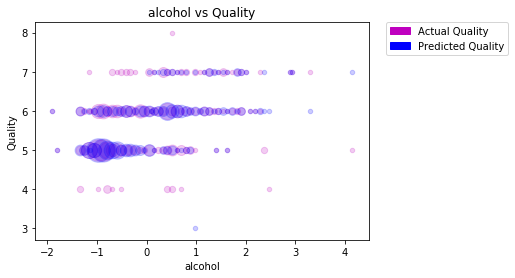

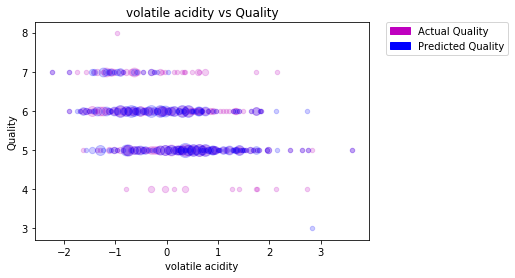

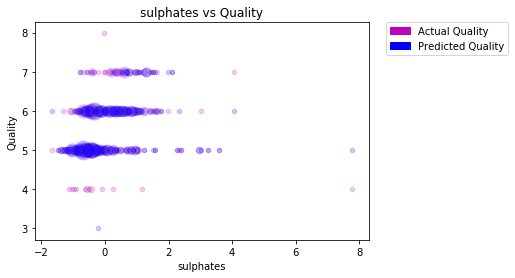

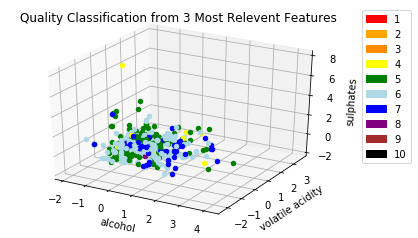

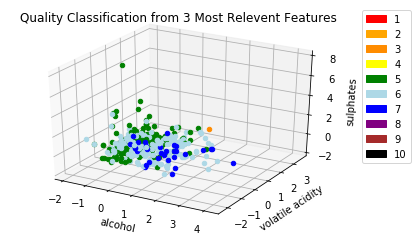

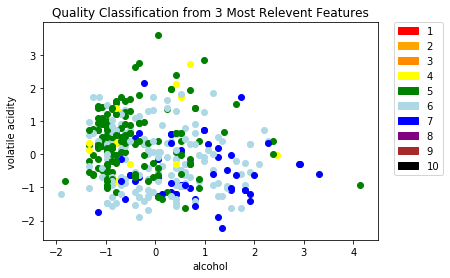

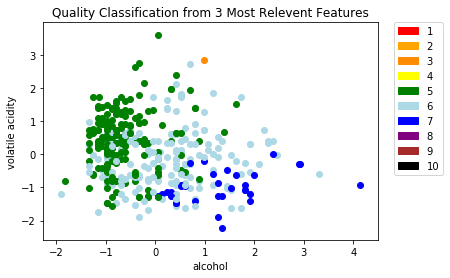

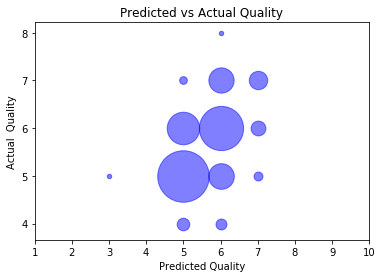

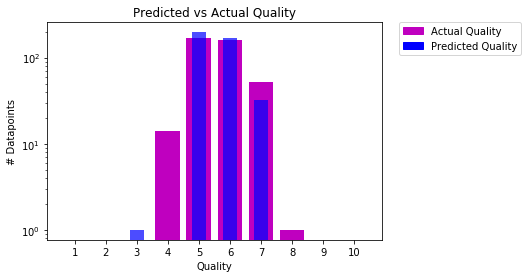


Mean squared error on training data: 0.49
Variance score (1 is perfect prediction): 0.15



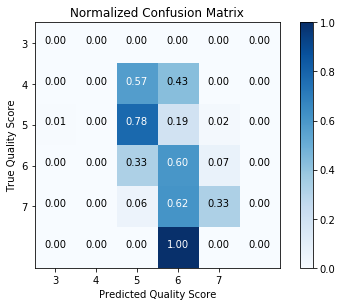

In [9]:
print_all_graphs(X_test, y_test, predictions, labels, 'Quality', 'red')

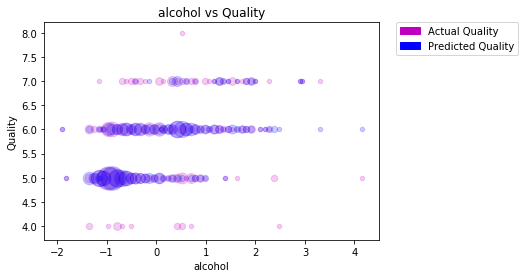

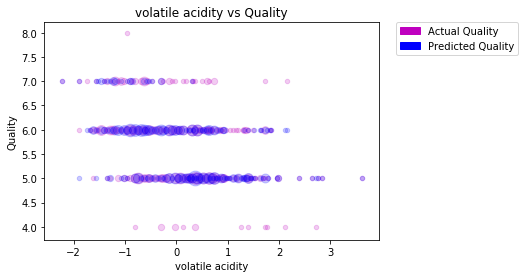

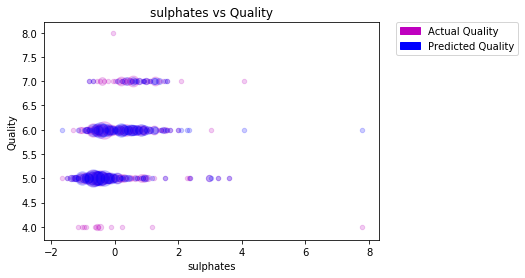

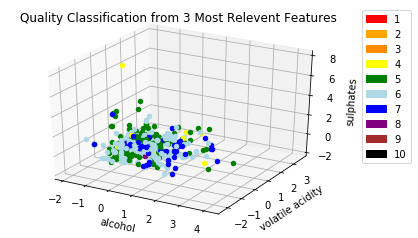

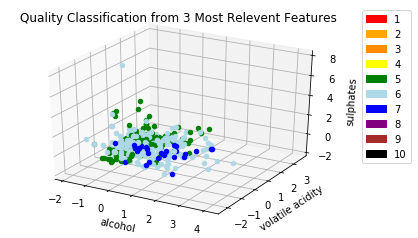

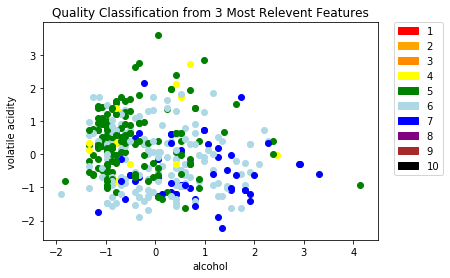

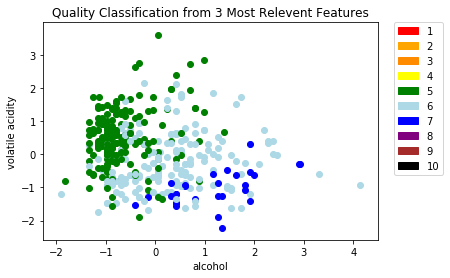

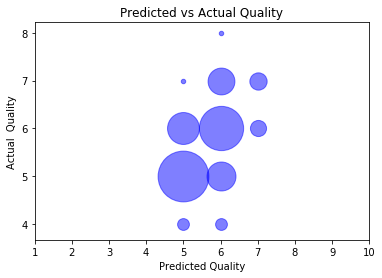

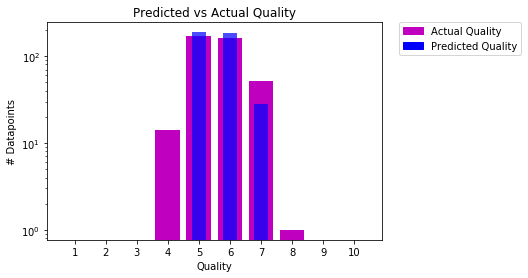


Mean squared error on training data: 0.46
Variance score (1 is perfect prediction): 0.20



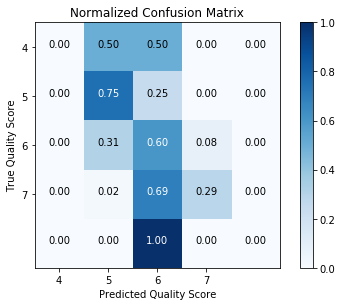

In [10]:
train_p = mlp.predict(X_train)


ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_train, y_train)
mlp.fit(X_train, y_train.ravel())
predictions = mlp.predict(X_test)  

print_all_graphs(X_test, y_test, predictions, labels, 'Quality', 'red')

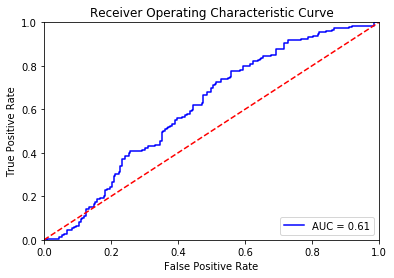

In [12]:
from sklearn import metrics

by = red.values[:, -1]



for x in range(len(by)):
    if by[x] > 5:
        by[x] = 1
    else:
        by[x] = 0
X_train, X_test, by_train, by_test = train_test_split(X, by) 

probs = mlp.predict_proba(X_test) 
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(by_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()